In [52]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def img2jupyter(img):
    img1 = np.copy(img)
    if len(img1.shape)==2:
        img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)

    img2 = img1[:,:,::-1]
    fig = plt.figure()
    plt.imshow(img2)

# img_path = "/home/juan1995/research_juan/surgical_robotics_challenge/Media/test_img/problematic_segmentation.jpeg"
img_path = "/home/juan1995/research_juan/surgical_robotics_challenge/Media/test_img/problematic_segmentation2.jpeg"

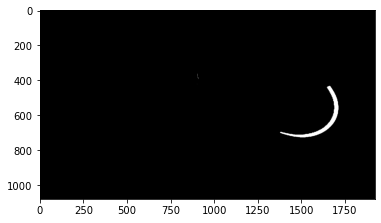

In [53]:
img = cv2.imread(img_path)

img2jupyter(img)

107


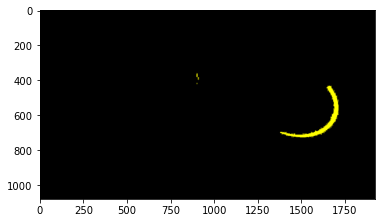

In [36]:
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)
cnts, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(cnts))

img2 =  np.copy(img)
cv2.drawContours(img2, cnts, -1, (0, 255, 255), -1)
img2jupyter(img2)


15
max area 9955.5


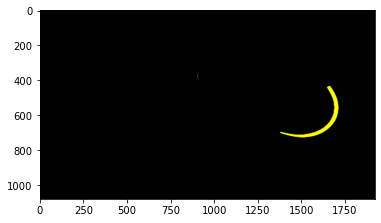

In [39]:
def find_contour(img: np.ndarray):
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(len(cnts))
    # Get only the biggest contour
    max_area = 0
    max_cnt = 0
    for c in cnts:
        area = cv2.contourArea(c)
        if area > max_area:
            max_cnt = c
            max_area = area

    print(f"max area {max_area}")
    return max_cnt



uint8
uint8


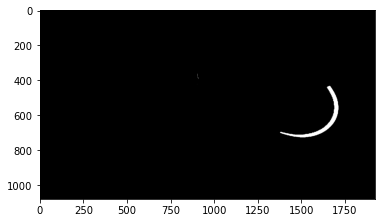

In [38]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
print(img.dtype)
print(thresh.dtype)
img2jupyter(thresh)

15
max area 9955.5


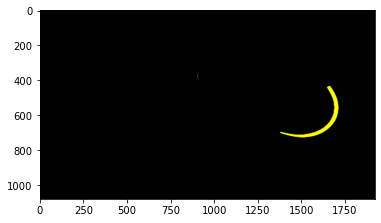

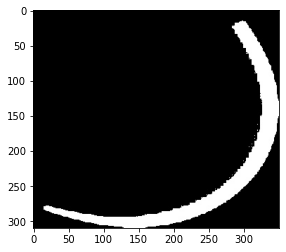

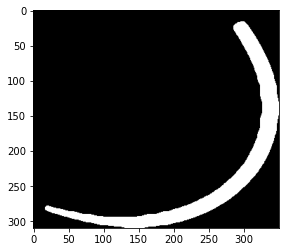

In [61]:
img = cv2.imread(img_path)
cnt = find_contour(img)

img2 =  np.copy(img)
cv2.drawContours(img2, [cnt], -1, (0, 255, 255), -1)

x, y, w, h = cv2.boundingRect(cnt)
p = 15
x, y = x - p, y - p
w, h = w + p, h + p
crop_img = img[y : y + h, x : x + w]
bb = (x, y, w, h)


blur = cv2.medianBlur(img, 9)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,125, 255,cv2.THRESH_BINARY)
crop_img2 = thresh[y : y + h, x : x + w]

img2jupyter(img2)
img2jupyter(crop_img)
img2jupyter(crop_img2)